In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df=pd.read_csv(r'C:\Users\neela\Desktop\Data Science\Projects\ML Project\Algerian Forest Fire\Algerian_forest_cleaned.csv').reset_index()
df.head()

,index,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [91]:
df.columns

Index(['index', 'Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH',
       'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes',
       'Region'],
      dtype='object')

In [92]:
df.drop(['index', 'Unnamed: 0', 'day', 'month', 'year'],axis=1,inplace=True)

In [93]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [94]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [95]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [96]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [97]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [98]:
X=df.drop('FWI',axis=1)
Y=df['FWI']

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [100]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [101]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

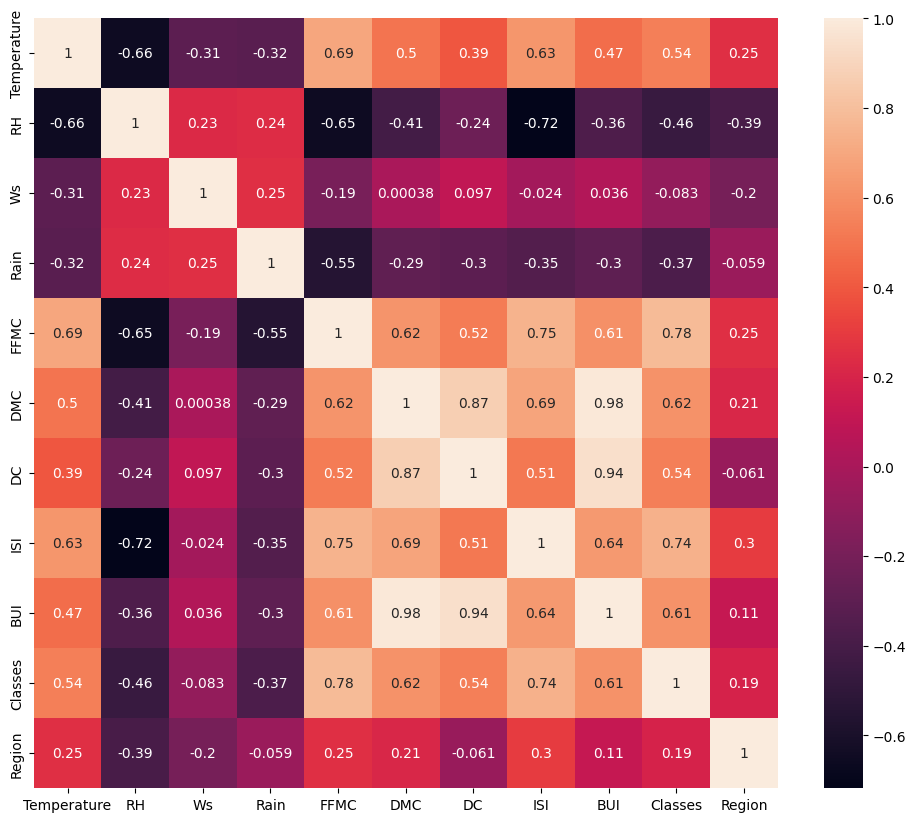

In [102]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [103]:
def Correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=x_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [104]:
## Threshold Domain expertise
corr_feature=Correlation(x_train,0.85)
corr_feature

{'BUI', 'DC'}

In [105]:
## drop features when correlation is more than 0.85 
# x_train.drop(corr_feature,axis=1,inplace=True)
# x_test.drop(corr_feature,axis=1,inplace=True)
# x_train.shape,x_test.shape

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_trained=scaler.fit_transform(x_train)
X_tested=scaler.fit_transform(x_test)

Text(0.5, 1.0, 'X_train After Scaling')

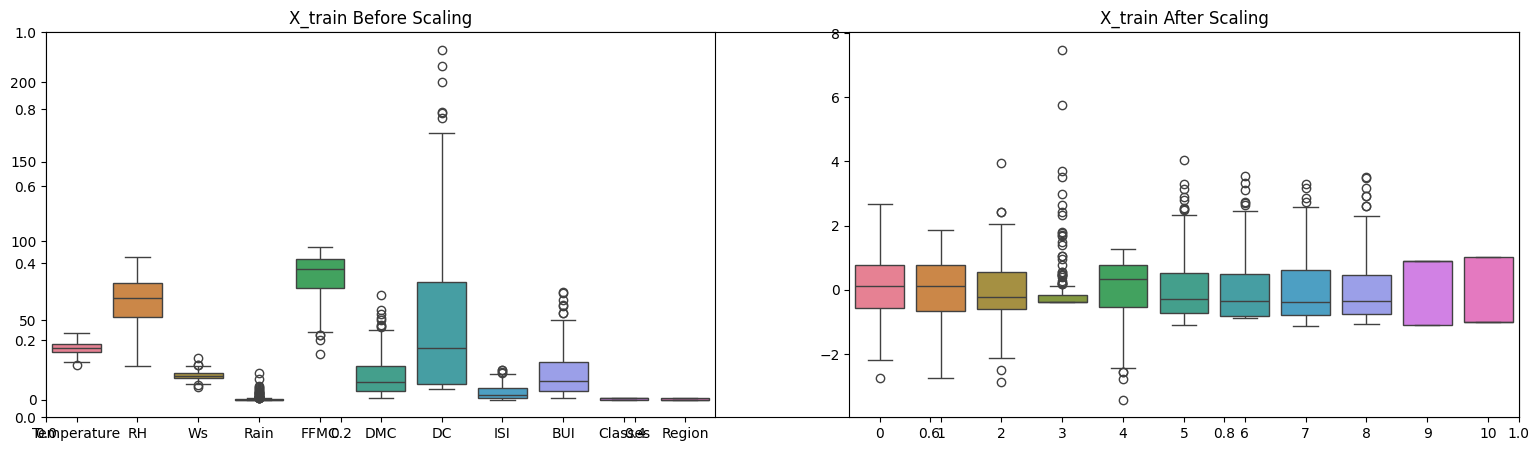

In [107]:
plt.subplots(figsize=(19, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_trained)
plt.title('X_train After Scaling')

----------------train data-------------
Mean Abosulte error 0.6794848402223804
R2 square 0.9723553091099947
------------------Test data-------------
Mean Abosulte error 0.9903501531731729
R2 square 0.9631237047751695


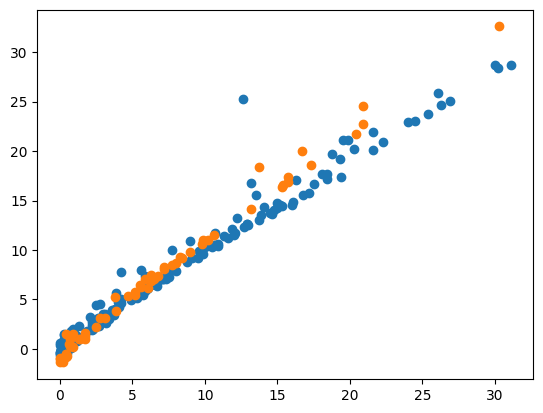

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

model=LinearRegression()
model.fit(x_trained,y_train)
print('----------------train data-------------')
y_pred=model.predict(x_trained)
mea=mean_absolute_error(y_train,y_pred)
score=r2_score(y_train,y_pred)
print("Mean Abosulte error",mea)
print("R2 square",score)
plt.scatter(y_train,y_pred)

print("------------------Test data-------------")
y_pred=model.predict(X_tested)
mea=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Abosulte error",mea)
print("R2 square",score)
plt.scatter(y_test,y_pred)

---------------Lasso Regression-------------------
----------------train data-------------
Mean Abosulte error 1.244823002085498
R2 square 0.947153529428194
------------------Test data-------------
Mean Abosulte error 0.8967913779542913
R2 square 0.9751919608268176


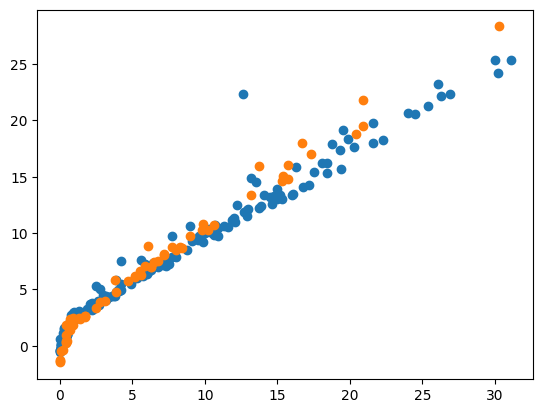

In [110]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

model=Lasso()
model.fit(x_trained,y_train)
print("---------------Lasso Regression-------------------")
print('----------------train data-------------')
y_pred=model.predict(x_trained)
mea=mean_absolute_error(y_train,y_pred)
score=r2_score(y_train,y_pred)
print("Mean Abosulte error",mea)
print("R2 square",score)
plt.scatter(y_train,y_pred)

print("------------------Test data-------------")
y_pred=model.predict(X_tested)
mea=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Abosulte error",mea)
print("R2 square",score)
plt.scatter(y_test,y_pred)


In [112]:
Lasso()

Lasso()

In [114]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(model,open("model.pkl","wb"))